# Expression Detection

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2 
import random 
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


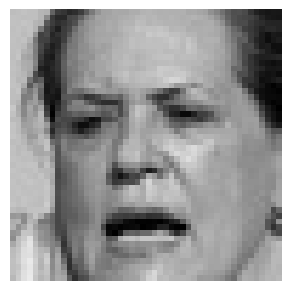

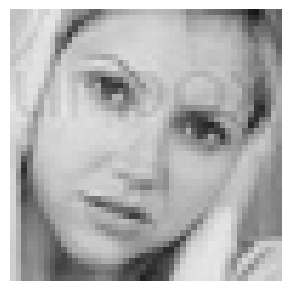

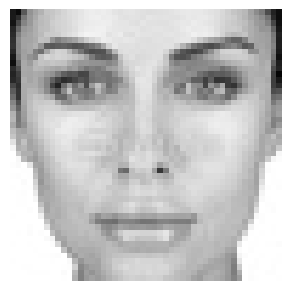

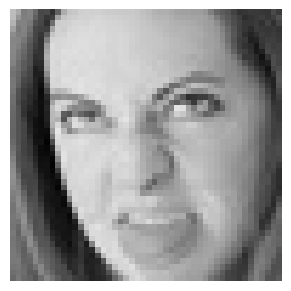

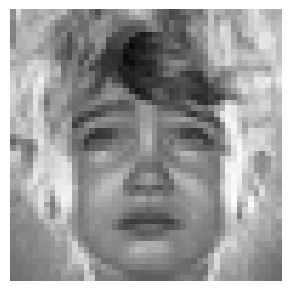

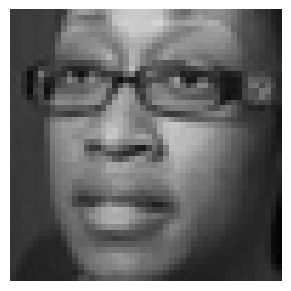

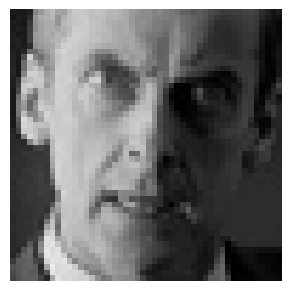

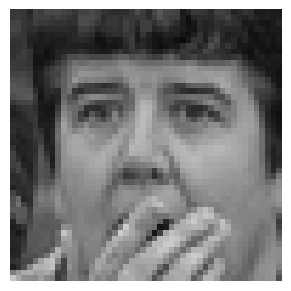

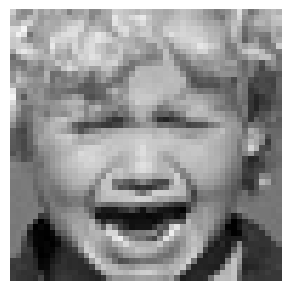

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [3]:
img_size =48
batch_size=64
datagen_train= ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/", target_size=(img_size,img_size),
                                                 color_mode = "grayscale",
                                                 batch_size = batch_size,
                                                 class_mode= "categorical",
                                                 shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size= batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
def convolutional(input_tensor, filters , kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size , padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = convolutional(inputs, 32 ,(3,3))
    conv_2 = convolutional(inputs, 64 ,(5,5))
    conv_3 = convolutional(inputs, 128 ,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs =[inputs], outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])
    
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor ='val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

**model initialisation**


In [9]:
history =  model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6387 - accuracy: 0.3742
Epoch 1: saving model to model.weights.h5
448/448 [==============================] - 195s 432ms/step - loss: 1.6387 - accuracy: 0.3742 - val_loss: 1.5934 - val_accuracy: 0.3693
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3508 - accuracy: 0.4877
Epoch 2: saving model to model.weights.h5
448/448 [==============================] - 194s 434ms/step - loss: 1.3508 - accuracy: 0.4877 - val_loss: 1.4897 - val_accuracy: 0.4393
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1915 - accuracy: 0.5538
Epoch 3: saving model to model.weights.h5
448/448 [==============================] - 191s 427ms/step - loss: 1.1915 - accuracy: 0.5538 - val_loss: 1.5654 - val_accuracy: 0.4153
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0639 - accuracy: 0.6073
Epoch 4: saving model to model.weights.h5
448/448 [==============================] - 

**Model evaluation**


In [10]:
model.evaluate(validation_generator)

113/113 [==============================] - 8s 72ms/step - loss: 2.1238 - accuracy: 0.4827


[2.1238224506378174, 0.48272499442100525]

**loss plotting**

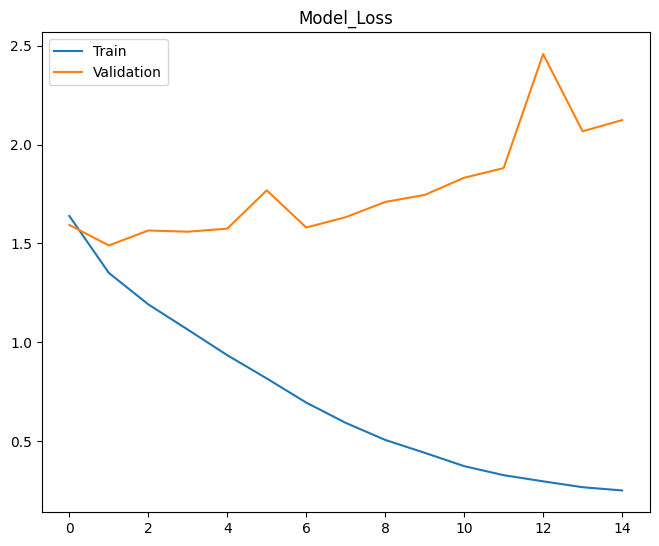

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top =1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

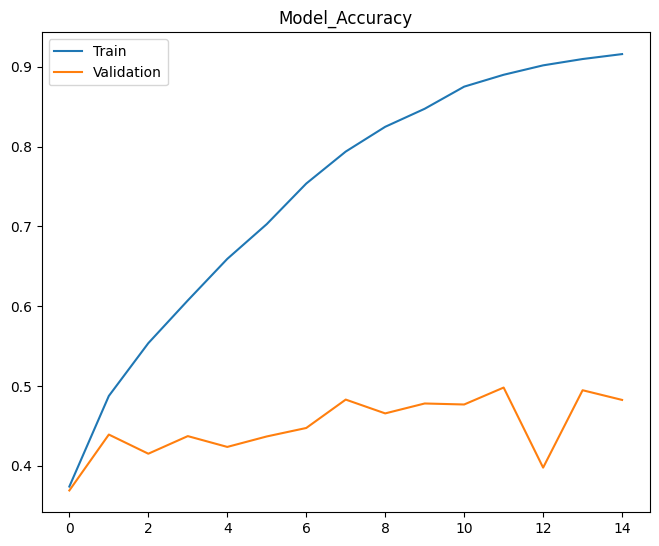

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top =1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**model saving**

In [14]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)